<a href="https://colab.research.google.com/github/schumbar/SJSU_CMPE255/blob/main/assignment_04/A_EDA/Part_A_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 04: Apache Beam Data Engineering Assignment
### Part A: Exploratory Data Analysis
By Shawn Chumbar
  
Please note that I have used ChatGPT to assist me with this assignment.


Tasks:
1. Pick a complex dataset from kaggle
2. Demonstrate advanced d3.js visualizations

Sources:
[cssbook](https://cssbook.net/chapter07.html)  
[Kaggle - Andrada GrandMaster](https://www.kaggle.com/andradaolteanu)  
[Kaggle - Andrada Notebooks](https://www.kaggle.com/andradaolteanu/code)   
[Data Analysis & Visualization in Python](https://python.plainenglish.io/unicorn-startups-data-analysis-and-visualization-377224424a6a
)   


Dataset Link:
[Childcare Costs](https://www.kaggle.com/datasets/sujaykapadnis/childcare-costs)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
# Load the datasets
childcare_costs = pd.read_csv('/content/drive/MyDrive/SJSU/CMPE_255/assignment_04/datasets/childcare_costs.csv')
counties = pd.read_csv('/content/drive/MyDrive/SJSU/CMPE_255/assignment_04/datasets/counties.csv')

In [4]:
# Display the first few rows of each dataset for a preliminary understanding
childcare_costs_head = childcare_costs.head()

In [5]:
counties_head = counties.head()


In [6]:
# Get info on the datasets
childcare_costs_info = childcare_costs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34567 entries, 0 to 34566
Data columns (total 61 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   county_fips_code           34567 non-null  int64  
 1   study_year                 34567 non-null  int64  
 2   unr_16                     34567 non-null  float64
 3   funr_16                    34567 non-null  float64
 4   munr_16                    34567 non-null  float64
 5   unr_20to64                 34567 non-null  float64
 6   funr_20to64                34567 non-null  float64
 7   munr_20to64                34567 non-null  float64
 8   flfpr_20to64               34567 non-null  float64
 9   flfpr_20to64_under6        34567 non-null  float64
 10  flfpr_20to64_6to17         34567 non-null  float64
 11  flfpr_20to64_under6_6to17  34567 non-null  float64
 12  mlfpr_20to64               34567 non-null  float64
 13  pr_f                       34567 non-null  flo

In [7]:
counties_info = counties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   county_fips_code    3144 non-null   int64 
 1   county_name         3144 non-null   object
 2   state_name          3144 non-null   object
 3   state_abbreviation  3144 non-null   object
dtypes: int64(1), object(3)
memory usage: 98.4+ KB


In [8]:
(childcare_costs_head, counties_head), (childcare_costs_info, counties_info)

((   county_fips_code  study_year  unr_16  funr_16  munr_16  unr_20to64  \
  0              1001        2008    5.42     4.41     6.32         4.6   
  1              1001        2009    5.93     5.72     6.11         4.8   
  2              1001        2010    6.21     5.57     6.78         5.1   
  3              1001        2011    7.55     8.13     7.03         6.2   
  4              1001        2012    8.60     8.88     8.29         6.7   
  
     funr_20to64  munr_20to64  flfpr_20to64  flfpr_20to64_under6  ...  memp_p  \
  0          3.5          5.6          68.9                 66.9  ...   21.55   
  1          4.6          5.0          70.8                 63.7  ...   21.96   
  2          4.6          5.6          71.3                 67.0  ...   21.28   
  3          6.3          6.1          70.2                 66.5  ...   22.80   
  4          6.4          7.0          70.6                 67.1  ...   22.88   
  
     femp_p   mcsa  mfccsa  mc_infant  mc_toddler  mc_pres

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualizations

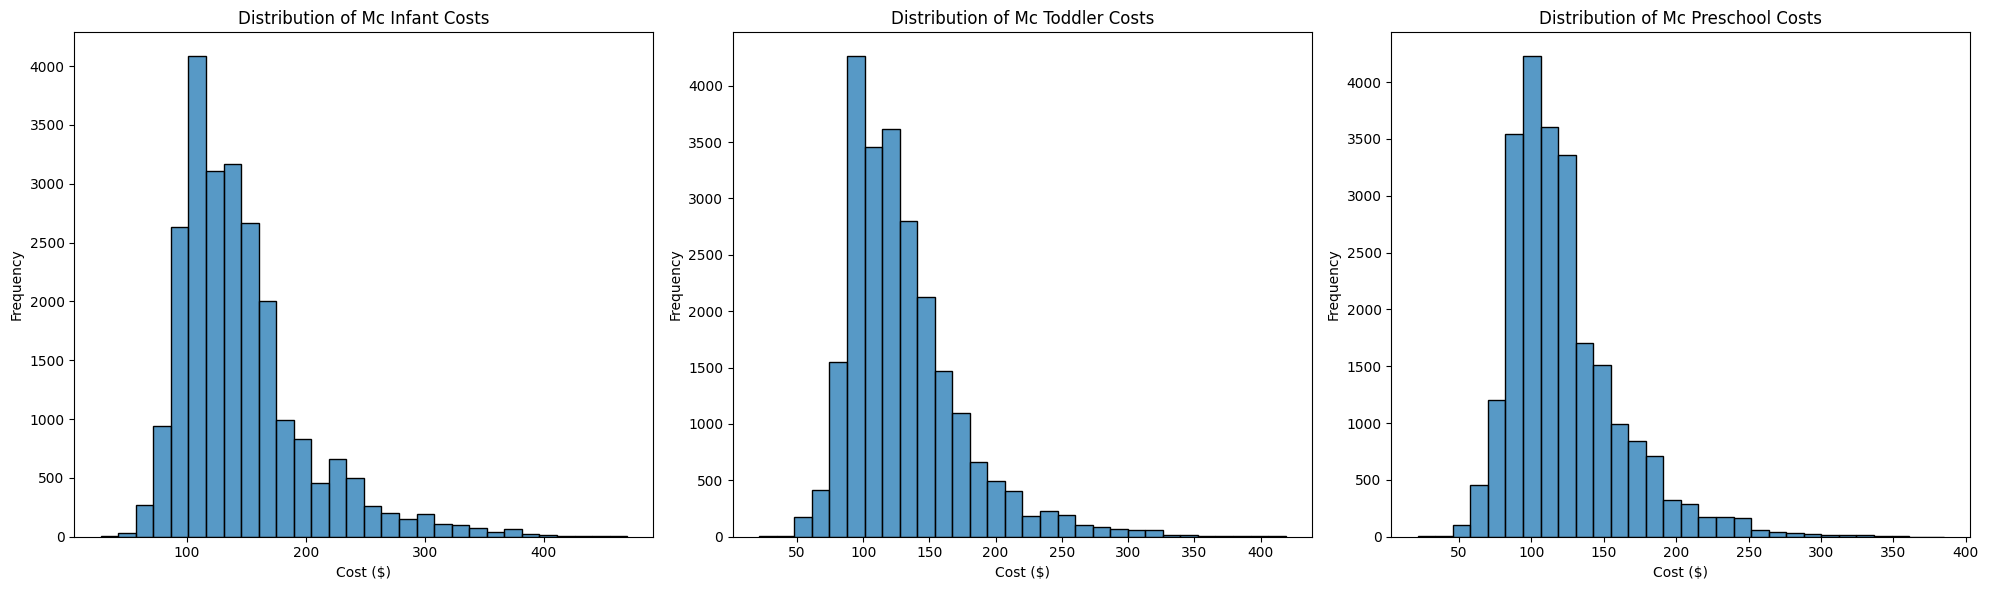

In [10]:
# Selecting relevant columns for the initial visualizations
childcare_columns = ['mc_infant', 'mc_toddler', 'mc_preschool', 'mhi_2018']
childcare_costs_subset = childcare_costs[childcare_columns]

# Visualization 1: Histograms of childcare costs for different age groups
plt.figure(figsize=(20, 6))

for i, column in enumerate(['mc_infant', 'mc_toddler', 'mc_preschool'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(childcare_costs_subset[column], kde=False, bins=30)
    plt.title(f'Distribution of {column.replace("_", " ").title()} Costs')
    plt.xlabel('Cost ($)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Distribution of Childcare Costs: The histograms show the distribution of childcare costs for infants, toddlers, and preschoolers. We observe that for all age groups, the costs are skewed towards the lower end, indicating that most counties report lower average childcare costs. However, there are still a significant number of counties with higher costs, as shown by the long tail of the distributions.

<ipython-input-11-cd65ad8b7722>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  childcare_costs_subset['average_childcare_cost'] = childcare_costs_subset[['mc_infant', 'mc_toddler', 'mc_preschool']].mean(axis=1)


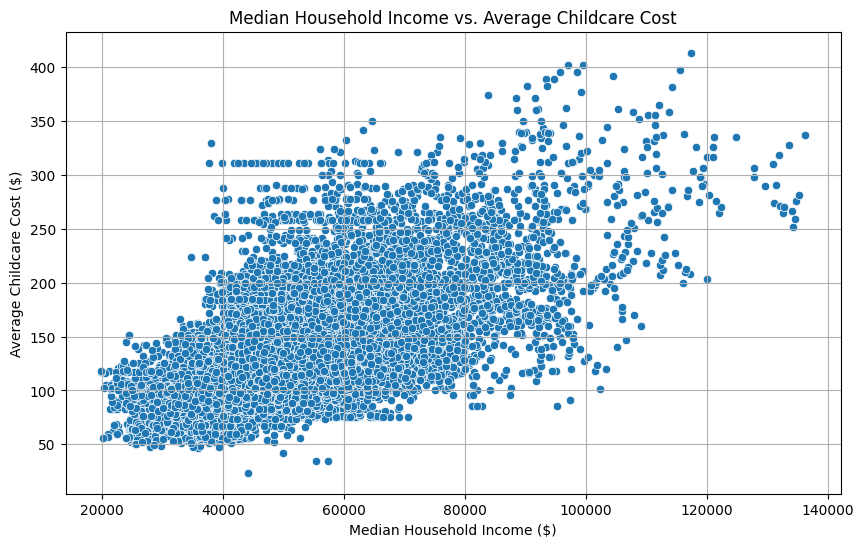

In [11]:
# Visualization 2: Scatter plot of median household income vs. average childcare cost
# For simplicity, we take an average of the childcare costs across different age groups.
childcare_costs_subset['average_childcare_cost'] = childcare_costs_subset[['mc_infant', 'mc_toddler', 'mc_preschool']].mean(axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='mhi_2018', y='average_childcare_cost', data=childcare_costs_subset)
plt.title('Median Household Income vs. Average Childcare Cost')
plt.xlabel('Median Household Income ($)')
plt.ylabel('Average Childcare Cost ($)')
plt.grid(True)
plt.show()

Median Household Income vs. Average Childcare Cost: The scatter plot indicates a trend where counties with higher median household incomes tend to have higher average childcare costs. This trend suggests that in areas where families earn more, childcare providers might charge more, possibly due to higher living costs or greater demand for premium services.

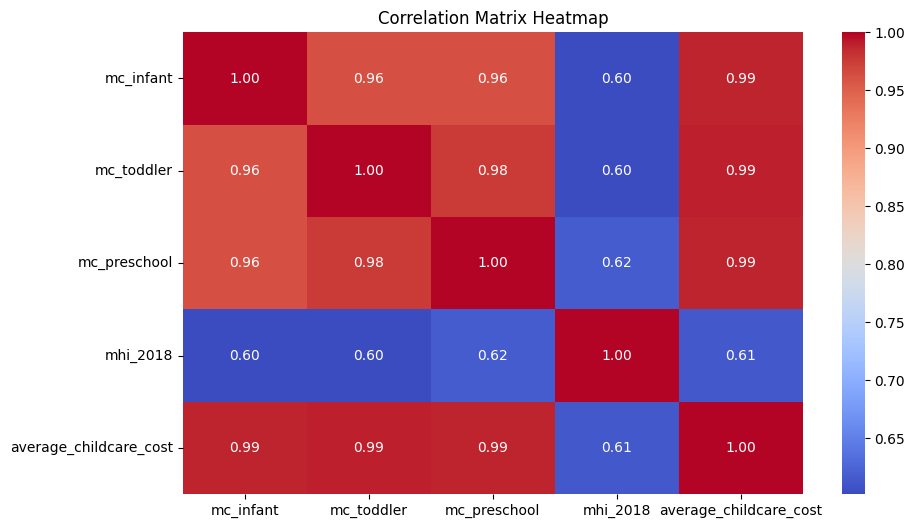

In [12]:
# Visualization 3: Heatmap of the correlation matrix
correlation_matrix = childcare_costs_subset.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


Correlation Matrix Heatmap: The heatmap shows the correlation coefficients between different variables. Notably, there is a positive correlation between median household income ('mhi_2018') and the childcare costs for different age groups, confirming the trend observed in the scatter plot. The childcare costs for infants, toddlers, and preschoolers are also highly correlated with each other, suggesting that the factors affecting the cost of childcare are consistent across different age groups.

#### Insights Gained
It seems that childcare costs for infants and toddlers is higher than the average childcare cost.

### D3.js Visualizations
Below are the D3.js visualizations showing the top 10 states and the bottom 5 states. We can use D3.js to create stunning visualizations to show the reader insights about our data.

In [13]:
# Import necessary libraries
import pandas as pd
import json
from IPython.display import HTML

In [14]:
cildcare_file_path = '/content/drive/MyDrive/SJSU/CMPE_255/assignment_04/datasets/childcare_costs.csv'
counties_file_path = '/content/drive/MyDrive/SJSU/CMPE_255/assignment_04/datasets/counties.csv'

In [15]:
import pandas as pd

# Load the datasets
counties_data = pd.read_csv(counties_file_path)
childcare_costs_data = pd.read_csv(cildcare_file_path)

# Check the first few rows of the datasets
counties_head = counties_data.head()
childcare_costs_head = childcare_costs_data.head()

counties_head, childcare_costs_head


(   county_fips_code     county_name state_name state_abbreviation
 0              1001  Autauga County    Alabama                 AL
 1              1003  Baldwin County    Alabama                 AL
 2              1005  Barbour County    Alabama                 AL
 3              1007     Bibb County    Alabama                 AL
 4              1009   Blount County    Alabama                 AL,
    county_fips_code  study_year  unr_16  funr_16  munr_16  unr_20to64  \
 0              1001        2008    5.42     4.41     6.32         4.6   
 1              1001        2009    5.93     5.72     6.11         4.8   
 2              1001        2010    6.21     5.57     6.78         5.1   
 3              1001        2011    7.55     8.13     7.03         6.2   
 4              1001        2012    8.60     8.88     8.29         6.7   
 
    funr_20to64  munr_20to64  flfpr_20to64  flfpr_20to64_under6  ...  memp_p  \
 0          3.5          5.6          68.9                 66.9  ...   

In [16]:
# Merging the two datasets on the county_fips_code column
combined_data = pd.merge(counties_data, childcare_costs_data, on="county_fips_code")

# For the purpose of a visualization example, we'll consider only the latest year in the dataset for simplicity.
# Let's find the latest year in the 'study_year' column.
latest_year = combined_data['study_year'].max()

# Selecting data for the latest year
latest_data = combined_data[combined_data['study_year'] == latest_year]

# For a choropleth map, we might be interested in visualizing average childcare cost, for example, 'mc_infant' column.
# We will create a simplified version for the visualization purpose, containing only necessary columns.
visualization_data = latest_data[['county_fips_code', 'county_name', 'state_name', 'mc_infant']]

# Renaming columns for better readability in the JSON file
visualization_data.rename(columns={
    'county_fips_code': 'id',
    'county_name': 'county',
    'state_name': 'state',
    'mc_infant': 'cost'
}, inplace=True)

# Save this data to a JSON file
json_file_path = '/content/drive/MyDrive/SJSU/CMPE_255/assignment_04/EDA/childcare_costs_data.json'
visualization_data.to_json(json_file_path, orient='records')

json_file_path, visualization_data.head()  # Display path and some records for verification


<ipython-input-16-2d908f8141e2>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visualization_data.rename(columns={


('/content/drive/MyDrive/SJSU/CMPE_255/assignment_04/EDA/childcare_costs_data.json',
       id          county    state    cost
 10  1001  Autauga County  Alabama  120.41
 21  1003  Baldwin County  Alabama  120.41
 32  1005  Barbour County  Alabama   86.20
 43  1007     Bibb County  Alabama  104.83
 54  1009   Blount County  Alabama  178.08)

In [17]:
# Aggregating data by state and calculating the average cost
average_cost_per_state = latest_data.groupby('state_name')['mc_infant'].mean().reset_index()

# Renaming columns for better readability
average_cost_per_state.rename(columns={
    'state_name': 'state',
    'mc_infant': 'average_cost'
}, inplace=True)

# Sorting the data by average cost, this will help in visualization clarity
average_cost_per_state_sorted = average_cost_per_state.sort_values('average_cost', ascending=False)

# Converting the data to JSON format, as it's commonly used in visualizations
json_data = average_cost_per_state_sorted.to_json(orient='records')

average_cost_per_state_sorted.head()  # Display some records for verification and JSON data


,state,average_cost
11,Hawaii,346.150000
21,Massachusetts,338.142857
1,Alaska,319.814286
6,Connecticut,293.375000
4,California,277.348793


In [37]:
top_10_states = average_cost_per_state_sorted.head(10)
json_top_10_states = top_10_states.to_json(orient='records')

In [38]:
non_null = average_cost_per_state_sorted.dropna()
bottom_5_states = non_null.tail(5)
json_bottom_5_states = bottom_5_states.to_json(orient='records')

In [39]:
json_data_for_chart = json_top_10_states

In [22]:
html_str = """
<!DOCTYPE html>
<html>
<head>
    <meta charset="utf-8">
    <title>Average Childcare Cost by State</title>
    <script src="https://d3js.org/d3.v6.min.js"></script>
    <style>
        /* You can add some basic styling for your bar chart here */
        .bar {
            fill: steelblue;
        }

        .bar:hover {
            fill: brown;
        }

        .axis-label {
            font-size: 14px;
        }

        .chart-title {
            font-size: 16px;
            font-weight: bold;
        }
    </style>
</head>
<body>
    <script>
        // D3.js script will go here
        // Sample data: replace the array below with your actual data
        var data = [
          {"state":"Hawaii","average_cost":346.15},
          {"state":"Massachusetts","average_cost":338.1428571429},
          {"state":"Alaska","average_cost":319.8142857143},
          {"state":"Connecticut","average_cost":293.375},
          {"state":"California","average_cost":277.3487931034},
          {"state":"Rhode Island","average_cost":264.416},
          {"state":"New York","average_cost":249.2806451613},
          {"state":"New Jersey","average_cost":242.2128571429},
          {"state":"Washington","average_cost":233.018974359},
          {"state":"Maryland","average_cost":228.5266666667}
        ];

        // Set the dimensions and margins of the graph
        var margin = {top: 30, right: 30, bottom: 70, left: 60},
            width = 460 - margin.left - margin.right,
            height = 400 - margin.top - margin.bottom;

        // Append the svg object to the body of the page
        var svg = d3.select("body")
          .append("svg")
            .attr("width", width + margin.left + margin.right)
            .attr("height", height + margin.top + margin.bottom)
          .append("g")
            .attr("transform",
                  "translate(" + margin.left + "," + margin.top + ")");

        // X axis
        var x = d3.scaleBand()
          .range([ 0, width ])
          .domain(data.map(function(d) { return d.state; }))
          .padding(0.2);
        svg.append("g")
          .attr("transform", "translate(0," + height + ")")
          .call(d3.axisBottom(x))
          .selectAll("text")
            .attr("transform", "translate(-10,0)rotate(-45)")
            .style("text-anchor", "end");

        // Add Y axis
        var y = d3.scaleLinear()
          .domain([0, d3.max(data, function(d) { return d.average_cost; })])
          .range([ height, 0]);
        svg.append("g")
          .call(d3.axisLeft(y));

        // Bars
        svg.selectAll("mybar")
          .data(data)
          .join("rect")
            .attr("class", "bar")
            .attr("x", function(d) { return x(d.state); })
            .attr("y", function(d) { return y(d.average_cost); })
            .attr("width", x.bandwidth())
            .attr("height", function(d) { return height - y(d.average_cost); });
    </script>
</body>
</html>

"""

In [23]:
# Displaying the D3.js visualization in the Colab notebook
display(HTML(html_str))

In [24]:
html_str = """
<!DOCTYPE html>
<html>
<head>
    <meta charset="utf-8">
    <title>Heatmap of Childcare Costs by State</title>
    <script src="https://d3js.org/d3.v6.min.js"></script>
    <style>
        /* Custom styling for the heatmap (optional) */
        .cell {
            stroke-width: 2;
        }
        .cell:hover {
            stroke: black;
        }
    </style>
</head>
<body>
    <script>
        // Your D3.js script will go here
        // Sample data: you should replace this array with your actual data
        var data = [
          {"state":"Hawaii","average_cost":346.15},
          {"state":"Massachusetts","average_cost":338.1428571429},
          {"state":"Alaska","average_cost":319.8142857143},
          {"state":"Connecticut","average_cost":293.375},
          {"state":"California","average_cost":277.3487931034},
          {"state":"Rhode Island","average_cost":264.416},
          {"state":"New York","average_cost":249.2806451613},
          {"state":"New Jersey","average_cost":242.2128571429},
          {"state":"Washington","average_cost":233.018974359},
          {"state":"Maryland","average_cost":228.5266666667}
        ];

        // Set the dimensions of the chart
        var margin = {top: 30, right: 30, bottom: 30, left: 30},
            width = 450 - margin.left - margin.right,
            height = 450 - margin.top - margin.bottom;

        // Append the SVG object to the body of the page
        var svg = d3.select("body").append("svg")
            .attr("width", width + margin.left + margin.right)
            .attr("height", height + margin.top + margin.bottom)
            .append("g")
            .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

        // Build color scale
        var myColor = d3.scaleSequential()
            .interpolator(d3.interpolateInferno) // You can change the color scheme
            .domain([0, d3.max(data, function(d) { return d.average_cost; })]) // Number of different colors

        // Create a tooltip
        var tooltip = d3.select("body").append("div")
            .attr("class", "tooltip")
            .style("opacity", 0);

        // Three function that change the tooltip when user hover / move / leave a cell
        var mouseover = function(event, d) {
            tooltip.transition()
                .duration(200)
                .style("opacity", .9);
            tooltip.html("State: " + d.state + "<br/>" + "Average Cost: " + d.average_cost)
                .style("left", (event.x + 20) + "px")
                .style("top", (event.y - 28) + "px");
        }
        var mousemove = function(event, d) {
            tooltip
                .style("left", (event.x + 20) + "px")
                .style("top", (event.y - 28) + "px");
        }
        var mouseleave = function(event, d) {
            tooltip.transition()
                .duration(500)
                .style("opacity", 0);
        }

        // Add squares (This assumes you have 10x5 grid, but you might have more or fewer states)
        svg.selectAll()
            .data(data, function(d) { return d.state+':'+d.average_cost;})
            .join("rect")
            .attr("x", function(d, i) { return (i % 10) * 40; }) // 40 is the width of each cell
            .attr("y", function(d, i) { return Math.floor(i / 10) * 40; }) // 40 is the height of each cell
            .attr("width", 38 ) // -2 to create a gap between cells
            .attr("height", 38 )
            .style("fill", function(d) { return myColor(d.average_cost)} )
            .style("stroke-width", 4)
            .style("stroke", "none")
            .style("opacity", 0.8)
            .on("mouseover", mouseover)
            .on("mousemove", mousemove)
            .on("mouseleave", mouseleave);
    </script>
</body>
</html>
"""

In [25]:
# Displaying the D3.js visualization in the Colab notebook
display(HTML(html_str))

In [26]:
html_str = """
<!DOCTYPE html>
<html>
<head>
    <meta charset="utf-8">
    <title>Interactive Bubble Chart - Childcare Costs by State</title>
    <script src="https://d3js.org/d3.v6.min.js"></script>
    <style>
        /* Styles for the bubble chart */
        .bubble {
            fill-opacity: 0.6;
            stroke-width: 2;
        }
        .bubble:hover {
            stroke: black;
        }
        .label {
            text-anchor: middle;
            font-family: 'Arial';
            fill: white;
        }
    </style>
</head>
<body>
    <script>
        // D3.js script for the interactive bubble chart

        // Data is now integrated directly into the script
        var data = [
            {"state":"Hawaii","average_cost":346.15},
            {"state":"Massachusetts","average_cost":338.1428571429},
            {"state":"Alaska","average_cost":319.8142857143},
            {"state":"Connecticut","average_cost":293.375},
            {"state":"California","average_cost":277.3487931034},
            {"state":"Rhode Island","average_cost":264.416},
            {"state":"New York","average_cost":249.2806451613},
            {"state":"New Jersey","average_cost":242.2128571429},
            {"state":"Washington","average_cost":233.018974359},
            {"state":"Maryland","average_cost":228.5266666667},
            {"state":"Alabama","average_cost":117.653880597},{"state":"Kansas","average_cost":115.8352380952},{"state":"Arkansas","average_cost":108.75},{"state":"South Dakota","average_cost":108.4548484848},{"state":"Mississippi","average_cost":70.0647560976}
        ];

        // Set dimensions and margins for the chart
        var margin = {top: 40, right: 40, bottom: 20, left: 20},
            width = 960 - margin.left - margin.right,
            height = 500 - margin.top - margin.bottom;

        // Create an SVG element and configure it
        var svg = d3.select("body").append("svg")
            .attr("width", width + margin.left + margin.right)
            .attr("height", height + margin.top + margin.bottom)
            .append("g")
            .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

        // Create a scale for the bubble sizes. It's important to have a domain and range that make sense for your data
        var radiusScale = d3.scaleSqrt()
            .domain([0, d3.max(data, function(d) { return d.average_cost; })])
            .range([10, 80]);  // Adjust the range based on the dimensions of your chart

        // Create a color scale for different states
        var colorScale = d3.scaleOrdinal()
            .domain(data.map(function(d) { return d.state; }))
            .range(d3.schemeTableau10);  // This provides a range of visually distinct colors

        // Create a simulation for the bubbles and configure forces
        var simulation = d3.forceSimulation(data)
            .force("x", d3.forceX(width / 2).strength(0.05))
            .force("y", d3.forceY(height / 2).strength(0.05))
            .force("collide", d3.forceCollide(function(d) { return radiusScale(d.average_cost) + 2; }));

        // Create the bubbles
        var bubbles = svg.selectAll(".bubble")
            .data(data)
            .join("circle")
            .attr("class", "bubble")
            .attr("r", function(d) { return radiusScale(d.average_cost); })
            .attr("fill", function(d) { return colorScale(d.state); })  // Different color for each state

        // Add drag capabilities
        var dragHandler = d3.drag()
            .on("start", function(event, d) {
                if (!event.active) simulation.alphaTarget(0.3).restart();
                d.fx = d.x;
                d.fy = d.y;
            })
            .on("drag", function(event, d) {
                d.fx = event.x;
                d.fy = event.y;
            })
            .on("end", function(event, d) {
                if (!event.active) simulation.alphaTarget(0);
                d.fx = null;
                d.fy = null;
            });

        dragHandler(bubbles);  // Enable dragging on the bubbles

        // Create the labels for each bubble
        var labels = svg.selectAll(".label")
            .data(data)
            .join("text")
            .attr("class", "label")
            .attr("dy", ".3em")
            .style("font-size", "12px")  // You can scale the font size based on the bubble size if you want
            .text(function(d) { return d.state; });

        // Run the simulation to determine the position of each bubble and label
        simulation.on("tick", function() {
            bubbles
                .attr("cx", function(d) { return d.x; })
                .attr("cy", function(d) { return d.y; });

            labels
                .attr("x", function(d) { return d.x; })
                .attr("y", function(d) { return d.y; });
        });
    </script>
</body>
</html>

"""

In [27]:
# Displaying the D3.js visualization in the Colab notebook
display(HTML(html_str))

In [28]:
import pandas as pd

# Load the datasets
counties_data = pd.read_csv(counties_file_path)
childcare_costs_data = pd.read_csv(cildcare_file_path)

In [29]:
childcare_costs_data.columns

Index(['county_fips_code', 'study_year', 'unr_16', 'funr_16', 'munr_16',
       'unr_20to64', 'funr_20to64', 'munr_20to64', 'flfpr_20to64',
       'flfpr_20to64_under6', 'flfpr_20to64_6to17',
       'flfpr_20to64_under6_6to17', 'mlfpr_20to64', 'pr_f', 'pr_p', 'mhi_2018',
       'me_2018', 'fme_2018', 'mme_2018', 'total_pop', 'one_race',
       'one_race_w', 'one_race_b', 'one_race_i', 'one_race_a', 'one_race_h',
       'one_race_other', 'two_races', 'hispanic', 'households',
       'h_under6_both_work', 'h_under6_f_work', 'h_under6_m_work',
       'h_under6_single_m', 'h_6to17_both_work', 'h_6to17_fwork',
       'h_6to17_mwork', 'h_6to17_single_m', 'emp_m', 'memp_m', 'femp_m',
       'emp_service', 'memp_service', 'femp_service', 'emp_sales',
       'memp_sales', 'femp_sales', 'emp_n', 'memp_n', 'femp_n', 'emp_p',
       'memp_p', 'femp_p', 'mcsa', 'mfccsa', 'mc_infant', 'mc_toddler',
       'mc_preschool', 'mfcc_infant', 'mfcc_toddler', 'mfcc_preschool'],
      dtype='object')

In [30]:
counties_data.columns

Index(['county_fips_code', 'county_name', 'state_name', 'state_abbreviation'], dtype='object')

In [31]:
merged_data = pd.merge(counties_data, childcare_costs_data, on='county_fips_code', how='inner')


In [32]:
merged_data.columns


Index(['county_fips_code', 'county_name', 'state_name', 'state_abbreviation',
       'study_year', 'unr_16', 'funr_16', 'munr_16', 'unr_20to64',
       'funr_20to64', 'munr_20to64', 'flfpr_20to64', 'flfpr_20to64_under6',
       'flfpr_20to64_6to17', 'flfpr_20to64_under6_6to17', 'mlfpr_20to64',
       'pr_f', 'pr_p', 'mhi_2018', 'me_2018', 'fme_2018', 'mme_2018',
       'total_pop', 'one_race', 'one_race_w', 'one_race_b', 'one_race_i',
       'one_race_a', 'one_race_h', 'one_race_other', 'two_races', 'hispanic',
       'households', 'h_under6_both_work', 'h_under6_f_work',
       'h_under6_m_work', 'h_under6_single_m', 'h_6to17_both_work',
       'h_6to17_fwork', 'h_6to17_mwork', 'h_6to17_single_m', 'emp_m', 'memp_m',
       'femp_m', 'emp_service', 'memp_service', 'femp_service', 'emp_sales',
       'memp_sales', 'femp_sales', 'emp_n', 'memp_n', 'femp_n', 'emp_p',
       'memp_p', 'femp_p', 'mcsa', 'mfccsa', 'mc_infant', 'mc_toddler',
       'mc_preschool', 'mfcc_infant', 'mfcc_toddler

In [33]:
import pandas as pd
# Step 1.2: Merge data based on the state
# Assuming 'State' is the common column in both datasets. If the name is different, please change it accordingly.
childcare_columns = ['mc_infant', 'mc_toddler', 'mc_preschool', 'mhi_2018']
childcare_costs_subset = childcare_costs[childcare_columns]
merged_data['average_childcare_cost'] = childcare_costs_subset[['mc_infant', 'mc_toddler', 'mc_preschool']].mean(axis=1)

# Step 1.3: Select relevant columns and rename them for clarity
# Assuming 'mhi_2018' stands for median household income in 2018 and 'cost' for the average childcare cost.
scatter_data = merged_data[['state_name', 'mhi_2018', 'average_childcare_cost']].rename(columns={
    'mhi_2018': 'MedianHouseholdIncome',
    'average_childcare_cost': 'AverageChildcareCost'
})

# Step 1.4: Clean the data (e.g., remove NaN values, convert types if necessary)
scatter_data = scatter_data.dropna()  # Remove rows with missing values
scatter_data['MedianHouseholdIncome'] = scatter_data['MedianHouseholdIncome'].astype(float)
scatter_data['AverageChildcareCost'] = scatter_data['AverageChildcareCost'].astype(float)
non_null = scatter_data.dropna()

# Step 1.5: Save the processed data to a JSON file
scatter_json = non_null.to_json(orient='records')

In [35]:
html_str = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Median Household Income vs Average Childcare Cost</title>
    <script src="https://d3js.org/d3.v6.min.js"></script>
    <style>
        .dot {{
            fill: steelblue;
            stroke: #fff;
        }}
    </style>
</head>
<body>

<script>
// Sample inline data (replace this with your actual data)
var data = {scatter_json};

// Set up SVG object with width, height and margin
var margin = {{top: 10, right: 30, bottom: 30, left: 60}},
    width = 460 - margin.left - margin.right,
    height = 400 - margin.top - margin.bottom;

var svg = d3.select("body")
  .append("svg")
    .attr("width", width + margin.left + margin.right)
    .attr("height", height + margin.top + margin.bottom)
  .append("g")
    .attr("transform",
          "translate(" + margin.left + "," + margin.top + ")");

// Add X axis
var x = d3.scaleLinear()
  .domain([0, d3.max(data, function(d) {{ return +d.MedianHouseholdIncome; }})])
  .range([ 0, width ]);
svg.append("g")
  .attr("transform", "translate(0," + height + ")")
  .call(d3.axisBottom(x));

// Add Y axis
var y = d3.scaleLinear()
  .domain([0, d3.max(data, function(d) {{ return +d.AverageChildcareCost; }})])
  .range([ height, 0]);
svg.append("g")
  .call(d3.axisLeft(y));

// Add dots to the scatterplot
svg.append('g')
  .selectAll("dot")
  .data(data)
  .enter()
  .append("circle")
    .attr("cx", function (d) {{ return x(d.MedianHouseholdIncome); }} )
    .attr("cy", function (d) {{ return y(d.AverageChildcareCost); }} )
    .attr("r", 5)
    .attr("class", "dot");

</script>

</body>
</html>
"""

In [36]:
# Displaying the D3.js visualization in the Colab notebook
display(HTML(html_str))

### Conclusion
Using D3.JS visualizations are a better way than the standard matplotlib way of showing the user great visualizations regarding a dataset. D3.js includes many different types of data visualizations.